# 1) Testing EoS 

In [ ]:
import numpy as np
from EOS import NeutronStarEOS

In [ ]:
apr = NeutronStarEOS('apr')
pres = apr.get_pressure()
dZeta = apr.dZeta_dXi()

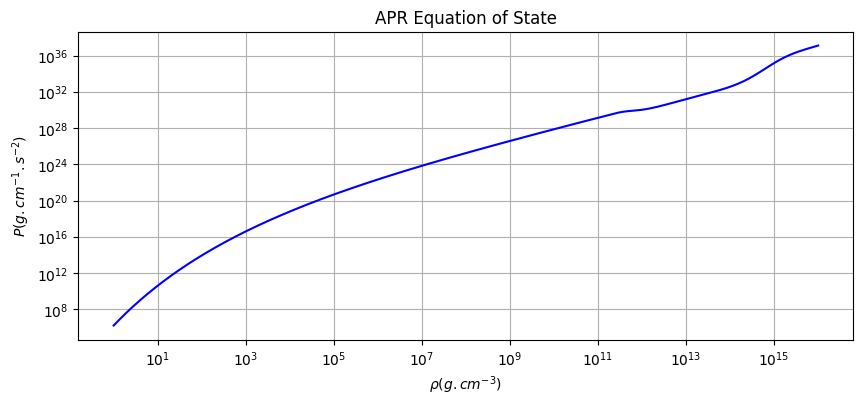

In [ ]:
apr.plot_EoS()

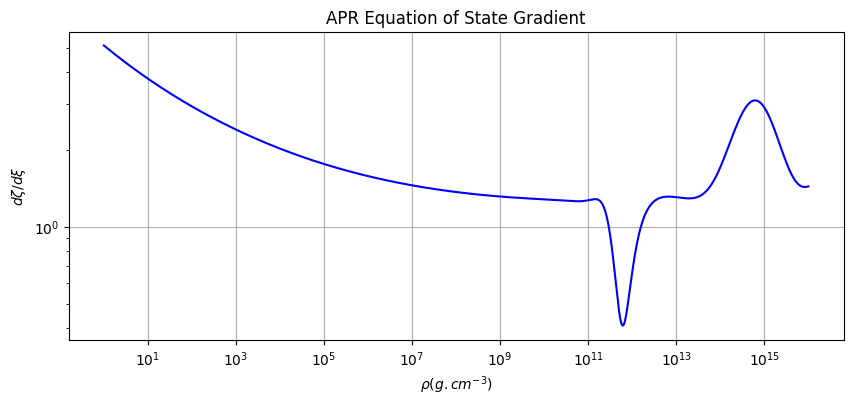

In [ ]:
apr.plot_dZeta_dXi()

# 2) Do I have the right equations?

In [1]:
from IPython.display import display, Math
import sympy as sp

In [2]:
import numpy as np

## 2.1) KG with IC

In [3]:
# KG equation

#Define the symbols and functions
r = sp.symbols('r')
fa, ma, c, mu, G = sp.symbols('f_a m_a c mu G')
a = sp.Function('a')(r)
rho = sp.Function('rho')(r)
llambda = sp.Function('lambda')(r)
nu = sp.Function('nu')(r)

# Define the equation
KG = ma**2 * sp.exp(llambda) * sp.sin(a) + (c**2 * rho)/(mu*fa) * sp.exp(llambda) + \
           sp.diff(a, r) * (-2/r + 
           1/2  * sp.diff(llambda, r) - 
           1/2  * sp.diff(nu, r))
           

# Display the equation in LaTeX form
display_KG = sp.Eq(sp.diff(a, r, r), KG)
display_KG

Eq(Derivative(a(r), (r, 2)), c**2*rho(r)*exp(lambda(r))/(f_a*mu) + m_a**2*exp(lambda(r))*sin(a(r)) + (0.5*Derivative(lambda(r), r) - 0.5*Derivative(nu(r), r) - 2/r)*Derivative(a(r), r))

In [5]:
# initial condition
ri, a_c, rho_c, a_i= sp.symbols('r_i a_c rho_c a_i')

# Define the expression for a_ri
a_ri = a_c + (ri**2 * (c**2 * rho_c + fa * ma**2 * mu * sp.sin(a_c))) / (6 * fa * mu)

# Display the expression
display_a_ri = sp.Eq(a_i,a_ri)
display_a_ri


Eq(a_i, a_c + r_i**2*(c**2*rho_c + f_a*m_a**2*mu*sin(a_c))/(6*f_a*mu))

## 2.2) TOV

In [15]:
# TOV
# Define additional symbols and functions needed for the new equation
P = sp.Function('P')(rho)  # Pressure as a function of r
dZetadXi = sp.Function('dZetadXi')(rho)  # Derivative of Zeta with respect to Xi

# Correcting the usage of rho and other functions
TOV = -(((fa / mu *  ((3 * P)  - (c**2 * rho) ) * sp.diff(a, r))) + ( (P + c**2 * rho) /2 * sp.diff(nu, r)))/sp.diff(P,rho)

# Display the new equation
display_TOV = sp.Eq(sp.diff(rho, r), TOV)
display_TOV

Eq(Derivative(rho(r), r), (-f_a*(-c**2*rho(r) + 3*P(rho(r)))*Derivative(a(r), r)/mu - (c**2*rho(r)/2 + P(rho(r))/2)*Derivative(nu(r), r))/Derivative(P(rho(r)), rho(r)))

In [ ]:
# Define the symbols
rho_ri = sp.symbols('rho_ri')

# Define P as a function of rho_c
P = sp.Function('P')(rho_c)

# Define the derivative of P with respect to rho at rho = rho_c
dP_drho_c = sp.diff(P, rho_c) 

# Define the complex expression for Rho[ri]
Rho_ri = rho_c - 1/(6 * mu * dP_drho_c) * ri**2 * (
    (4 * G * sp.pi * rho_c * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * sp.cos(a_c) + 3 * mu * P)) / c**2 +
    (4 * G * sp.pi * P * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * sp.cos(a_c) + 3 * mu * P)) / c**4 +
    (c**2 * rho_c * (c**2 * rho_c + fa * ma**2 * mu * sp.sin(a_c))) / mu -
    (3 * P * (c**2 * rho_c + fa * ma**2 * mu * sp.sin(a_c))) / mu
)

# Display the expression
display_Rho_ri = sp.Eq(rho_ri, Rho_ri)
display_Rho_ri


Eq(rho_ri, rho_c - r_i**2*(4*pi*G*rho_c*(-2*a_c*c**2*f_a*rho_c + c**2*mu*rho_c + 2*f_a**2*m_a**2*mu*cos(a_c) - 2*f_a**2*m_a**2*mu + 3*mu*P(rho_c))/c**2 + 4*pi*G*(-2*a_c*c**2*f_a*rho_c + c**2*mu*rho_c + 2*f_a**2*m_a**2*mu*cos(a_c) - 2*f_a**2*m_a**2*mu + 3*mu*P(rho_c))*P(rho_c)/c**4 + c**2*rho_c*(c**2*rho_c + f_a*m_a**2*mu*sin(a_c))/mu - 3*(c**2*rho_c + f_a*m_a**2*mu*sin(a_c))*P(rho_c)/mu)/(6*mu*Derivative(P(rho_c), rho_c)))

## 2.3) Metric Potential

In [ ]:
# metric potential
G = sp.symbols('G')  # Gravitational constant

# Define the new equation
metric_pot = -1/r + sp.exp(llambda)/r + (8 * sp.exp(llambda) * G * sp.pi * r * P)/c**4 - \
                 (8 * sp.exp(llambda) * fa * G * sp.pi * r * (-fa * ma**2 * mu * (-1 + sp.cos(a)) + \
                 c**2 * a * rho))/(c**4 * mu) + \
                 (4 * fa**2 * G * sp.pi * r * sp.diff(a, r)**2)/c**4

# Display the new equation
display_metric_pot = sp.Eq(sp.diff(nu, r),metric_pot)
display_metric_pot



Eq(Derivative(nu(r), r), 4*pi*G*f_a**2*r*Derivative(a(r), r)**2/c**4 - 8*pi*G*f_a*r*(c**2*a(r)*rho(r) - f_a*m_a**2*mu*(cos(a(r)) - 1))*exp(lambda(r))/(c**4*mu) + 8*pi*G*r*P(rho_c)*exp(lambda(r))/c**4 + exp(lambda(r))/r - 1/r)

In [ ]:

# Define PP as a function of rho_c if it's not already defined
P = sp.Function('P')(rho_c)
nu_c = sp.symbols('nu_c')  # Gravitational constant
nu_i = sp.symbols('nu_i')

# Define the expression for Nu[ri]
Nu_ri = nu_c + (4 * G * sp.pi * ri**2 * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * sp.cos(a_c) + 3 * mu * P)) / (3 * c**4 * mu)

# Display the expression
display_Nu_ri = sp.Eq(nu_i,Nu_ri)
display_Nu_ri


Eq(nu_i, 4*pi*G*r_i**2*(-2*a_c*c**2*f_a*rho_c + c**2*mu*rho_c + 2*f_a**2*m_a**2*mu*cos(a_c) - 2*f_a**2*m_a**2*mu + 3*mu*P(rho_c))/(3*c**4*mu) + nu_c)

## 2.4) Mass Equation

In [ ]:
# mass equation
mass_eq = 1/r - sp.exp(llambda)/r + (8 * sp.exp(llambda) * G * sp.pi * r * P)/c**4 + \
                 (8 * sp.exp(llambda) * fa * G * sp.pi * r * (-fa * ma**2 * mu * (-1 + sp.cos(a)) + \
                 c**2 * a * rho))/(c**4 * mu) + \
                 (4 * fa**2 * G * sp.pi * r * sp.diff(a, r)**2)/c**4

# Display the new equation
display_mass_eq = sp.Eq(sp.diff(llambda, r), mass_eq)
display_mass_eq



Eq(Derivative(lambda(r), r), 4*pi*G*f_a**2*r*Derivative(a(r), r)**2/c**4 + 8*pi*G*f_a*r*(c**2*a(r)*rho(r) - f_a*m_a**2*mu*(cos(a(r)) - 1))*exp(lambda(r))/(c**4*mu) + 8*pi*G*r*P(rho_c)*exp(lambda(r))/c**4 - exp(lambda(r))/r + 1/r)

In [1]:
# Define the symbols
llambda_i = sp.symbols('lambda_i')

# Define the expression for Lambda[ri]
Lambda_ri = (8 * G * sp.pi * ri**2 * (fa**2 * ma**2 * mu + a_c * c**2 * fa * rho_c + c**2 * mu * rho_c - fa**2 * ma**2 * mu * sp.cos(a_c))) / (3 * c**4 * mu)

# Display the expression
display_Lambda_ri = sp.Eq(llambda_i, Lambda_ri)
display_Lambda_ri

NameError: name 'sp' is not defined

# 3) Formulate the Solver and test it

In [1]:
%matplotlib widget
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_bvp
from EOS import NeutronStarEOS
from ode_system import central_densities, ode_system, create_boundary_conditions

In [2]:
apr_eos = NeutronStarEOS('APR')

In [73]:
print(f"{10**(6.4):0.4e}")

2.5119e+06


In [84]:
# Define the domain for r
ri = 1e-15
rf = 1e6 # right below the expected radius to debug the code first
start_order = int(np.log10(ri))
end_order = int(np.log10(rf))
points_per_order = 1000  # Adjust the number of points per order of magnitude

# Create a single array with the desired number of points per order of magnitude
#r = np.logspace(start_order, end_order, (end_order - start_order) * points_per_order, endpoint=True)
r_original = np.logspace(start_order, end_order, (end_order - start_order) * points_per_order, endpoint=True)
r_dense = np.logspace(5, 6, 1000)

# Combine the meshes
r = np.unique(np.concatenate((r_original, r_dense)))

print(len(r))

21999


In [ ]:
# same function from ode_system but running it here for easy modification of
# boundary conditions to test and debug

def create_boundary_conditions(eos_class, rho_c, nu_c, lambda_c, a_c, ri):
    """Create a boundary conditions function with specific initial conditions."""
    
    P = eos_class.get_pressure()
    dPdrho = eos_class.dP_dRho() # need to make this method
    nu_initial = nu_c + (4 * G * np.pi * ri**2 * \
                            (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + \
                            c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + \
                                3 * mu * P(rho_c))) / (3 * c**4 * mu)
    
    llambda_initial = lambda_c + (8 * G * np.pi * ri**2 * \
                 (fa**2 * ma**2 * mu + a_c * c**2 * fa * rho_c + c**2 * mu * rho_c -  \
                  fa**2 * ma**2 * mu * np.cos(a_c))) / (3 * c**4 * mu)
    
    rho_initial = rho_c - 1/(6 * mu * dPdrho(rho_c)) * ri**2 * (
        (4 * G * np.pi * rho_c * \
         (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + 3 * mu * P(rho_c))) \
            / c**2 + (4 * G * np.pi * P(rho_c) * (-2 * fa**2 * ma**2 * mu - 2 * a_c * c**2 * fa * rho_c + \
                                           c**2 * mu * rho_c + 2 * fa**2 * ma**2 * mu * np.cos(a_c) + 3 * mu * P(rho_c))) / c**4 \
                                            + (c**2 * rho_c * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / mu - \
                                                  (3 * P(rho_c) * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / mu )
    a_initial_guess = a_c + (ri**2 * (c**2 * rho_c + fa * ma**2 * mu * np.sin(a_c))) / (6 * fa * mu)

    def boundary_conditions(ya, yb):
        return np.array([
            ya[1],                 #  ya[1] a_prime(ri) = 0
            ya[0] - a_initial_guess,                 #  yb[1] a_prime(rf) = 0
            ya[2] - nu_initial,    # nu(ri) = nu_initial
            ya[3] - llambda_initial, # lambda(ri) = lambda_initial
            ya[4] - rho_initial    # rho(ri) = rho_initial
        ])
    return boundary_conditions, a_initial_guess, nu_initial, llambda_initial, rho_initial

In [85]:
boundary_conditions_func, a_initial, nu_initial, llambda_initial, rho_initial = create_boundary_conditions(eos_class=apr_eos,
    rho_c=1e15,
    nu_c=1,
    lambda_c=0,
    a_c=-2.3807e-04,
    ri=ri
)
print(boundary_conditions_func)
print(f"a_initial= {a_initial:0.2e}" )
print(f"nu_initial = {nu_initial:0.2e}")
print(f"llambda_initial= {llambda_initial:0.2e}")
print(f"rho_initial:{rho_initial:0.2e}")

<function create_boundary_conditions.<locals>.boundary_conditions at 0x135063ce0>
a_initial= -2.38e-04
nu_initial = 1.00e+00
llambda_initial= 6.21e-43
rho_initial:1.00e+15


In [86]:
# Define the initial guess for the solution
ac = a_initial  # Initial guess for a(r)
y_initial = np.zeros((5, r.size))  # Initialize the array with zeros

idx_1_km =  np.argmax(r >= 5e5) # solution should increase around here
# set the first value of a(r) to ac
y_initial[0, :idx_1_km] = ac
# linearly interpolate the remaining values of a(r) from ac to final_value_a
y_initial[0, idx_1_km:] = 0

y_initial[1, :] = 0  # a_prime(r)
y_initial[2, :] = nu_initial  # nu(r)
y_initial[3, :] = llambda_initial  # llambda(r)
# rho should be constant for a long distance and then decreases right before the radius
y_initial[4, :idx_1_km] = rho_initial  # rho(r) 
y_initial[4, idx_1_km:] = 1e2

In [87]:
# the system need to be wrapped since solve_bvp expects the ode
# function to be only function of (independent, dependent) variables
def ode_system_wrapper(r, y):
    P = apr_eos.get_pressure()
    dPdRho = apr_eos.dP_dRho()
    return ode_system(r, y, P, dPdRho)

In [88]:
# initialize a list to save prev
debug_info = []

# Solve the BVP
sol = solve_bvp(ode_system_wrapper, boundary_conditions_func, r, y_initial)

# Process the solution
a = sol.sol(r)[0]
a_prime = sol.sol(r)[1]
nu = sol.sol(r)[2]
llambda = sol.sol(r)[3]
rho = sol.sol(r)[4]

# Check if the solution is successful and process it
if sol.success:
    print('Solution found!')
else:
    print("Solution was not successful.")

Solution was not successful.


In [91]:
def plot_somethin(y, x, y_label, x_label=r'$r(km)$', y_scale=None, debug=False):
    plt.figure(figsize=(8, 4))
    plt.plot(x/1e5, y, color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if debug:
       plt.xlim(x[-700]/1e5,x[-1]/1e5) 
    else:
        plt.xscale('log')
    if y_scale=='log':
        plt.yscale('log')
    plt.axvline(x=1e6/1e5, linestyle='--', color='grey', linewidth=0.4,zorder=-1)
    
    return plt.show()

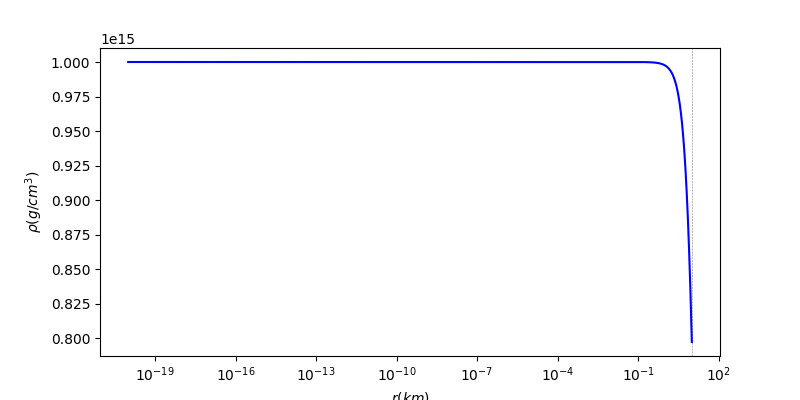

In [98]:
plot_somethin(rho, r, r"$\rho(g/cm^{3})$", x_label=r'$r(km)$')